In [1]:
import pandas as pd
from sklearn import neighbors
import numpy as np
%matplotlib inline  
import seaborn

In [2]:
df = pd.read_csv('topsix2.csv', encoding="latin1")

In [3]:
df.head()

,id,address,categories,city,country,latitude,longitude,name,postalCode,twitter,websites,no_twitter,no_website,no_menu,state,address_location
0,AVwdQuH3ByjofQCxnPfO,1660 Champa St,"breweries , wineries",Denver,US,39.747169,-104.993057,D'vine Wine Denver,80202,NaN,http://www.dvinewineusa.com,True,False,True,CO,"1660 Champa St, Denver, CO, 80202, US"
1,AVwc2E2VIN2L1WUfphDU,1555 Blake St,"music venue,bar , music venue,bar,pubs,bars , ...",Denver,US,39.750288,-104.999768,World of Beer,80202,mapquest,"http://worldofbeer.com/Locations/Lodo,http://m...",False,False,True,CO,"1555 Blake St, Denver, CO, 80202, US"
2,AVwdhk0DIN2L1WUfwqtr,7260 W Alaska Dr,"music venue,bars , pubs,pubs,breweries,bar",Denver,US,39.709068,-105.077258,World of Beer,80226,NaN,http://worldofbeer.com/Locations/Belmar,True,False,True,CO,"7260 W Alaska Dr, Denver, CO, 80226, US"
3,AVwcizXVkufWRAb5wVk8,1257 W 120th Ave,"american restaurant,brewery,fast food restaura...",Denver,US,39.914928,-105.000843,C.b. & Potts,80234,NaN,http://cbpotts.com,True,False,True,CO,"1257 W 120th Ave, Denver, CO, 80234, US"
4,AVwdQdHXIN2L1WUft5XE,W Jeppesen Terminal 5,"airport lounge,brewery,bar",Denver,US,39.848760,-104.673743,Boulder Beer Tap House,80249,NaN,http://boulderbeer.com,True,False,True,CO,"W Jeppesen Terminal 5, Denver, CO, 80249, US"


In [4]:
df2 = df.drop(['city', 'state','websites','categories','id','country','name','twitter','no_menu','address','no_twitter','no_website','address_location'], axis=1)

In [5]:
df2.head()

,latitude,longitude,postalCode
0,39.747169,-104.993057,80202
1,39.750288,-104.999768,80202
2,39.709068,-105.077258,80226
3,39.914928,-105.000843,80234
4,39.848760,-104.673743,80249


In [6]:
df3 = df2.dropna(subset=['latitude', 'longitude', 'postalCode'])

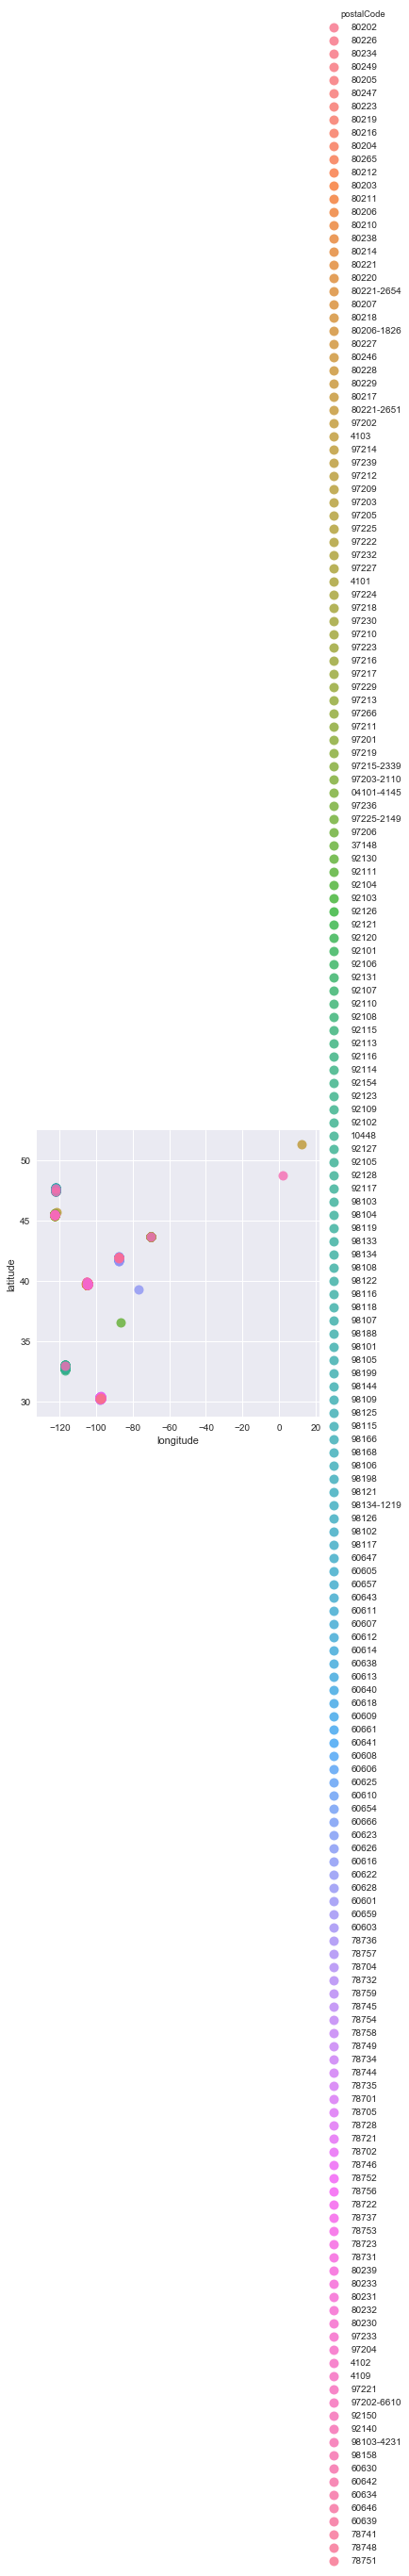

In [7]:
seaborn.lmplot('longitude', 'latitude', data=df3, fit_reg=False,hue="postalCode", scatter_kws={"marker": "D","s": 100})

In [8]:
X = df3.as_matrix(columns=['latitude', 'longitude'])
y = np.array(df3['postalCode'])

In [9]:
clf = neighbors.KNeighborsClassifier(3, weights = 'uniform')
trained_model = clf.fit(X, y)

In [10]:
trained_model.score(X, y)

0.9008474576271186

In [11]:
x_test = np.array([[39.739580,-104.987310]])

In [12]:
trained_model.predict(x_test)

array(['80202'], dtype=object)

In [13]:
df3 = pd.read_csv('df3.csv', encoding="latin1")

In [14]:
df3.head()

,id,address,categories,city,country,latitude,longitude,name,postalCode,twitter,websites,no_twitter,no_website,no_menu,state,address_location,clusters
0,AVwdQuH3ByjofQCxnPfO,1660 Champa St,"breweries , wineries",Denver,US,39.747169,-104.993057,D'vine Wine Denver,80202,NaN,http://www.dvinewineusa.com,True,False,True,CO,"1660 Champa St, Denver, CO, 80202, US",3
1,AVwc2E2VIN2L1WUfphDU,1555 Blake St,"music venue,bar , music venue,bar,pubs,bars , ...",Denver,US,39.750288,-104.999768,World of Beer,80202,mapquest,"http://worldofbeer.com/Locations/Lodo,http://m...",False,False,True,CO,"1555 Blake St, Denver, CO, 80202, US",3
2,AVwdhk0DIN2L1WUfwqtr,7260 W Alaska Dr,"music venue,bars , pubs,pubs,breweries,bar",Denver,US,39.709068,-105.077258,World of Beer,80226,NaN,http://worldofbeer.com/Locations/Belmar,True,False,True,CO,"7260 W Alaska Dr, Denver, CO, 80226, US",3
3,AVwcizXVkufWRAb5wVk8,1257 W 120th Ave,"american restaurant,brewery,fast food restaura...",Denver,US,39.914928,-105.000843,C.b. & Potts,80234,NaN,http://cbpotts.com,True,False,True,CO,"1257 W 120th Ave, Denver, CO, 80234, US",3
4,AVwdQdHXIN2L1WUft5XE,W Jeppesen Terminal 5,"airport lounge,brewery,bar",Denver,US,39.848760,-104.673743,Boulder Beer Tap House,80249,NaN,http://boulderbeer.com,True,False,True,CO,"W Jeppesen Terminal 5, Denver, CO, 80249, US",3


In [15]:
df3 = df3.drop(['clusters','city', 'state','websites','categories','id','country','name','twitter','no_menu','address','no_twitter','no_website','address_location'], axis=1)

In [16]:
df3.head()

,latitude,longitude,postalCode
0,39.747169,-104.993057,80202
1,39.750288,-104.999768,80202
2,39.709068,-105.077258,80226
3,39.914928,-105.000843,80234
4,39.848760,-104.673743,80249
